C:\Users\erick\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5233 - loss: 4.1858 - val_accuracy: 0.9333 - val_loss: 0.2890
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9333 - loss: 0.2577 - val_accuracy: 0.9333 - val_loss: 0.2528
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9333 - loss: 0.2374 - val_accuracy: 0.9333 - val_loss: 0.2431
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9333 - loss: 0.2294 - val_accuracy: 0.9333 - val_loss: 0.2367
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9333 - loss: 0.2237 - val_accuracy: 0.9333 - val_loss: 0.2321
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9333 - loss: 0.2196 - val_accuracy: 0.9333 - val_loss: 0.2278
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9333 - loss: 0.2156 - val_accuracy: 0.9333 - val_loss: 0.2242
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9333 - loss: 0.2122 - val_accuracy: 0.

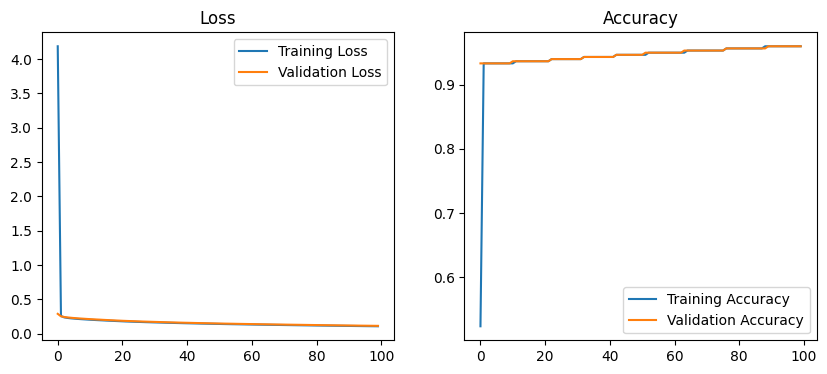

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9600 - loss: 0.1073     
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - loss: 0.1141     

Resultados:
Entrenamiento - Pérdida y Accuracy: [0.10733983665704727, 0.9599999785423279]
Validación - Pérdida y Accuracy: [0.11406083405017853, 0.9599999785423279]

Pesos del modelo:
[array([[ 0.05128404, -0.21505804,  0.45704216]], dtype=float32), array([-0.43216372,  0.8027021 , -0.3705388 ], dtype=float32)]


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt



x_train = np.arange(-30, 30, 0.2)
y_train = 0.5 * x_train - 2 + 0.15 * np.random.randn(len(x_train))
x_val = np.arange(-30, 30, 0.2)
y_val = 0.5 * x_val - 2 + 0.5 * np.random.randn(len(x_val))


y_train_classes = np.digitize(y_train, bins=[-30, 0, 30])  
y_val_classes = np.digitize(y_val, bins=[-30, 0, 30])



model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=3, activation='softmax', input_shape=[1]) 
])

model.summary()



model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='sgd',
    metrics=['accuracy']
)



history = model.fit(
    x_train, y_train_classes,
    epochs=100,
    validation_data=(x_val, y_val_classes)
)



plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()



mse_train = model.evaluate(x_train, y_train_classes)
mse_val = model.evaluate(x_val, y_val_classes)

print("\nResultados:")
print(f"Entrenamiento - Pérdida y Accuracy: {mse_train}")
print(f"Validación - Pérdida y Accuracy: {mse_val}")


print("\nPesos del modelo:")
print(model.get_weights())